In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [7]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///../Resources/hawaii.sqlite")

In [8]:
# reflect an existing database into a new model
Base = automap_base()

In [9]:
# reflect the tables
Base.prepare(autoload_with=engine)

In [14]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [17]:
#find date from the earliest time
session.query(Measurement.date).order_by(Measurement.date).first()

('2010-01-01',)

In [18]:
###########################################################################################
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
###########################################################################################

In [19]:
# Starting from the most recent data point in the database. 
latest_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first().date
latest_date

'2017-08-23'

In [20]:
# Calculate the date one year from the last date in data set.
last_year = dt.datetime.strptime(latest_date, '%Y-%m-%d') - dt.timedelta(days=365)
last_year

datetime.datetime(2016, 8, 23, 0, 0)

In [21]:
# Perform a query to retrieve the data and precipitation scores
prcp_scores_query = session.query(Measurement.date, func.avg(Measurement.prcp)).\
    filter(Measurement.date >= last_year).\
        group_by(Measurement.date).all()

prcp_scores_query

[('2016-08-24', 1.5549999999999997),
 ('2016-08-25', 0.07714285714285715),
 ('2016-08-26', 0.016666666666666666),
 ('2016-08-27', 0.06399999999999999),
 ('2016-08-28', 0.5166666666666666),
 ('2016-08-29', 0.24333333333333332),
 ('2016-08-30', 0.011666666666666667),
 ('2016-08-31', 0.6359999999999999),
 ('2016-09-01', 0.006),
 ('2016-09-02', 0.05),
 ('2016-09-03', 0.254),
 ('2016-09-04', 0.276),
 ('2016-09-05', 0.08499999999999999),
 ('2016-09-06', 0.246),
 ('2016-09-07', 0.3333333333333333),
 ('2016-09-08', 0.07666666666666667),
 ('2016-09-09', 0.17833333333333332),
 ('2016-09-10', 0.27999999999999997),
 ('2016-09-11', 0.25),
 ('2016-09-12', 0.308),
 ('2016-09-13', 0.45166666666666666),
 ('2016-09-14', 2.3800000000000003),
 ('2016-09-15', 0.8266666666666667),
 ('2016-09-16', 0.11714285714285715),
 ('2016-09-17', 0.13599999999999998),
 ('2016-09-18', 0.10600000000000001),
 ('2016-09-19', 0.064),
 ('2016-09-20', 0.14714285714285716),
 ('2016-09-21', 0.19499999999999998),
 ('2016-09-22', 

In [22]:
# Save the query results as a Pandas DataFrame. Explicitly set the column names
prcp_df = pd.DataFrame(prcp_scores_query, columns=['date', 'precipitation'])
#prcp_df.set_index('date', inplace=True)
prcp_df.head()

,date,precipitation
0,2016-08-24,1.555000
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.064000
4,2016-08-28,0.516667


In [23]:
# Sort the dataframe by date
prcp_df.sort_values(by='date')
prcp_df.head()

,date,precipitation
0,2016-08-24,1.555000
1,2016-08-25,0.077143
2,2016-08-26,0.016667
3,2016-08-27,0.064000
4,2016-08-28,0.516667


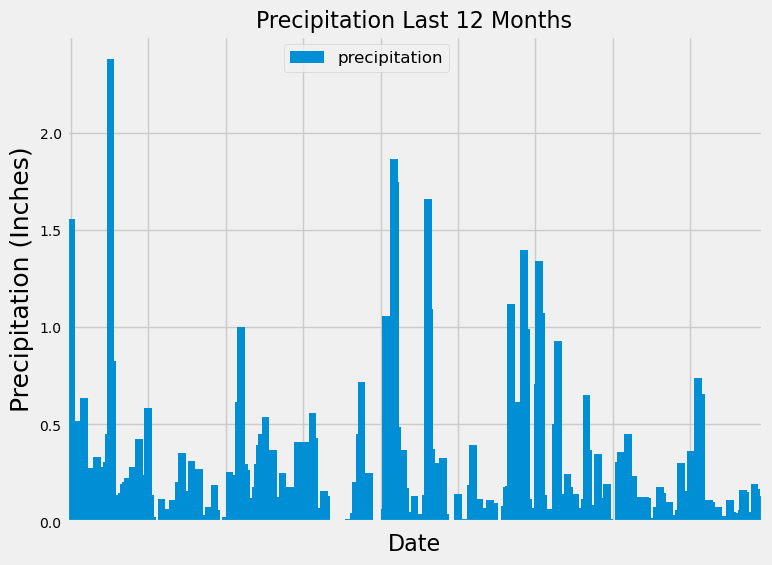

In [25]:
# Use Pandas Plotting with Matplotlib to plot the data
    #Creating Function to store the plt configurations

plot = prcp_df.plot(kind='bar', width=4, figsize=(8,6))
plt.locator_params(axis='x', nbins=9)
plot.xaxis.set_major_formatter(plt.NullFormatter())
plot.tick_params(axis='y', labelsize=10)
plot.grid(True)
plt.legend(bbox_to_anchor=(.3,1), fontsize="12")
plt.title("Precipitation Last 12 Months", size=16)
plt.ylabel("Precipitation (Inches)", size=18)
plt.xlabel("Date", size=16)
plt.savefig("../Plot_Output/prcp_plot.png")
plt.show()

In [26]:
# Use Pandas to calculate the summary statistics for the precipitation data
prcp_df.describe()

,precipitation
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


# Exploratory Station Analysis

In [27]:
# Design a query to calculate the total number of stations in the dataset
session.query(Station.id).count()

9

In [28]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_station = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_station


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [29]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
most_active_station = active_station[0][0]  #placing the station ID and the count in both lists 
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station).all()

[(54.0, 85.0, 71.66378066378067)]

In [30]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station USC00519281

temp_result = session.query(Measurement.station, Measurement.tobs).\
    filter(Measurement.station == most_active_station).\
    filter(Measurement.date >= last_year )
temp_result_df = pd.DataFrame(temp_result)
#temp_result_df.set_index('station', inplace=True)
temp_result_df.head()

,station,tobs
0,USC00519281,77.0
1,USC00519281,80.0
2,USC00519281,80.0
3,USC00519281,75.0
4,USC00519281,73.0


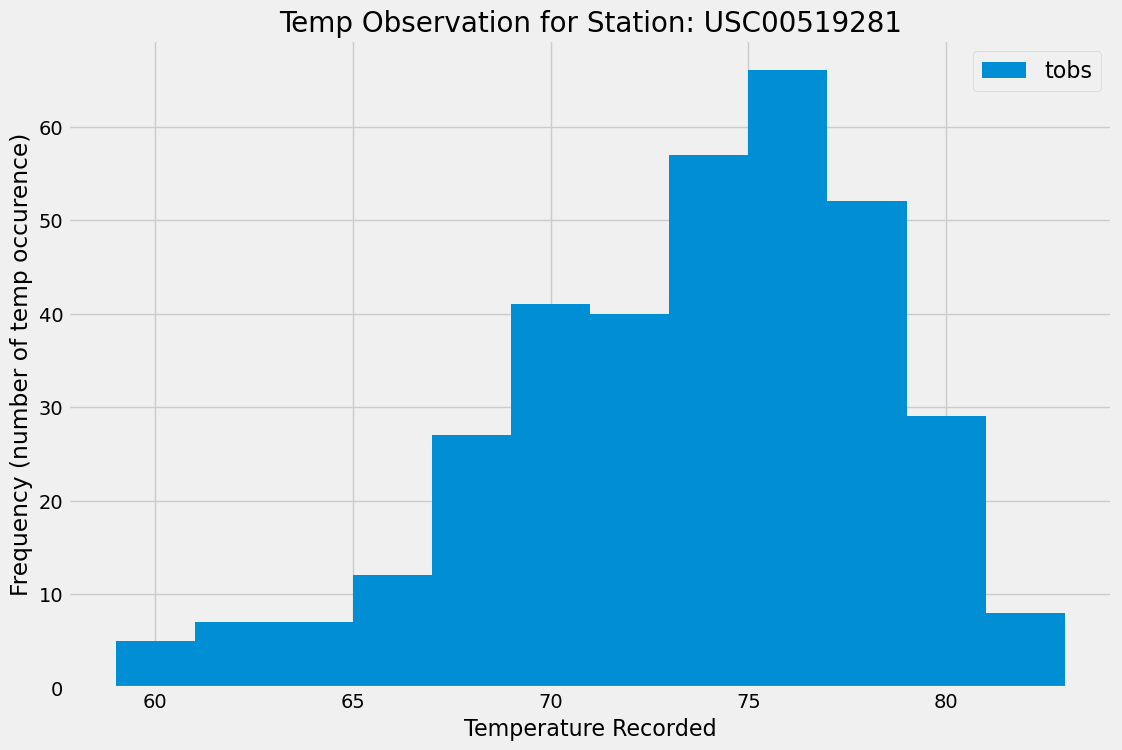

In [32]:
#plot the station USC00519281 results as a histogram
temp_result_df.plot.hist(by='station', bins=12, figsize=(12,8))
plt.grid(True)
plt.title(f'Temp Observation for Station: {most_active_station}',fontsize=20)
plt.xlabel("Temperature Recorded", fontsize=16)
plt.ylabel("Frequency (number of temp occurence)")
plt.legend(bbox_to_anchor=(1,1), fontsize=16)
plt.savefig("../Plot_Output/temp_plot.png")
plt.show()


# Close Session

In [33]:
# Close Session
session.close()